# Introduction to Regression with Neural Networks in TenorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
X = tf.constant(np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]))
y = tf.constant(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]))

## Steps in modelling with TensorFlow
1. create a model - input, output, hidden layers
2. compiling a model - loss function, optimizer, evaluation metrics
3. fitting the model

In [3]:
tf.random.set_seed(42)
# 1. Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = "SGD", 
              metrics=['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 12.1865 - mae: 12.1865
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 12.0540 - mae: 12.0540
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.9215 - mae: 11.9215
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.7890 - mae: 11.7890
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 11.6565 - mae: 11.6565


### Prediction

In [4]:
model.predict([17.0])

1/1 [==============================] - 0s 28ms/step


array([[9.404939]], dtype=float32)

## Improving the Model

In [5]:
# Split Data
from sklearn.model_selection import train_test_split
# Turn tensors into NumPy
# Convert the TensorFlow tensors to NumPy arrays
X_np = X.numpy()
y_np = y.numpy()
# Split the data
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Convert the splits back into TensorFlow tensors
X_train = tf.convert_to_tensor(X_train_np)
X_test = tf.convert_to_tensor(X_test_np)
y_train = tf.convert_to_tensor(y_train_np)
y_test = tf.convert_to_tensor(y_test_np)

In [6]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0001), 
              metrics=['mae'])


model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 430ms/step - loss: 13.9917 - mae: 13.9917
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8123 - mae: 13.8123
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.6435 - mae: 13.6435
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.4384 - mae: 13.4384
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1873 - mae: 13.1873
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 12.8827 - mae: 12.8827
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5084 - mae: 12.5084
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 12.0446 - mae: 12.0446
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 11.4663 - mae: 11.4663
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8206 - mae: 10.8206
Epoch 11/100
1/1 [==============================] - 0s 2m

In [7]:
predictions = model.predict([X_test])

1/1 [==============================] - 0s 29ms/step


### Evaluate the model

#### Visualise
- Data
- The Model
- The training of a model
- The predictions

In [8]:
# More Data
X = tf.range(-100, 100, 4)
y = X + 10

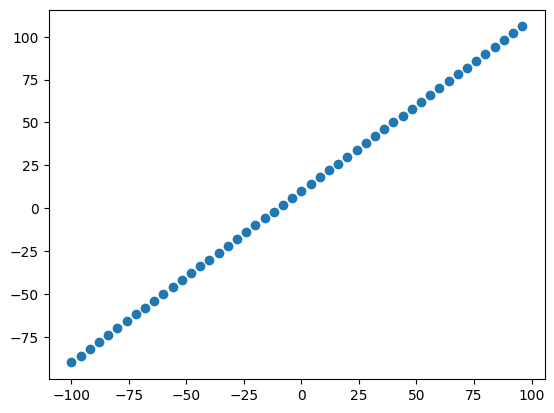

In [9]:
# Visualize the data
plt.scatter(X, y);

In [10]:
# The 3 sets...
len(X)

50

In [11]:
# Split the data into train and test
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

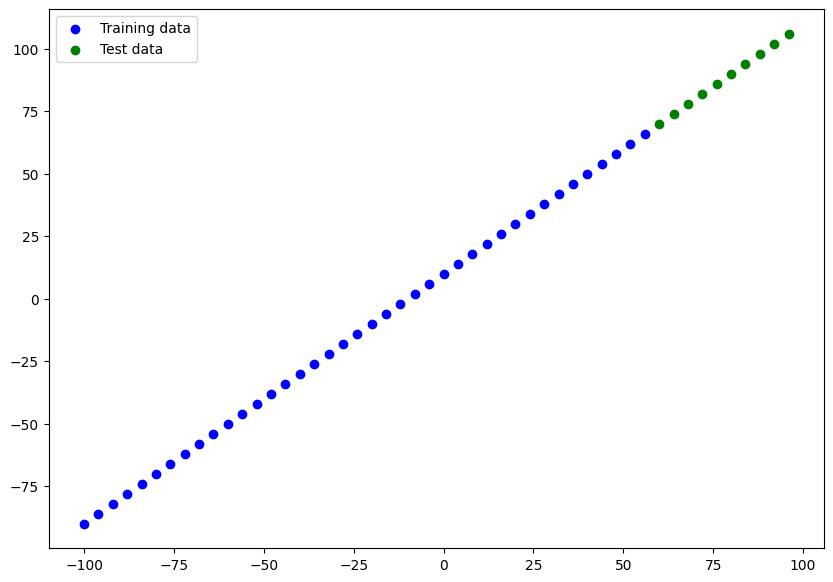

In [12]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend();

##### Visualising the model

In [25]:
# Let's create a model that builds automatically
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name='input_layer1', activation='relu'),
    tf.keras.layers.Dense(100, name='input_layer2', activation='relu'),
    tf.keras.layers.Dense(100, name='input_layer3', activation='relu'),
    tf.keras.layers.Dense(1, name='output_layer')
], name= 'model_1')

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
              metrics=['mae'])

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 100)               200       
                                                                 
 input_layer2 (Dense)        (None, 100)               10100     
                                                                 
 input_layer3 (Dense)        (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


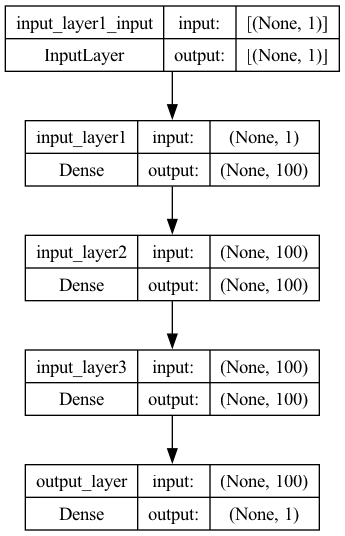

In [27]:
plot_model(model=model, show_shapes=True)

##### Fitting

In [28]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 43.0572 - mae: 43.0572
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 40.1684 - mae: 40.1684
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 37.6599 - mae: 37.6599
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 35.1792 - mae: 35.1792
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 33.0160 - mae: 33.0160
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 30.9125 - mae: 30.9125
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 28.5725 - mae: 28.5725
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 25.9038 - mae: 25.9038
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 23.1209 - mae: 23.1209
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 20.0360 - mae: 20.0360
Epoch 11/100
2/2 [==============================] - 0s 1ms/

##### Visualise Predictions

In [29]:
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))

1/1 [==============================] - 0s 24ms/step


In [30]:
# Plot predictions against the true values
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels
    :param train_data: 
    :param train_labels: 
    :param test_data: 
    :param test_labels: 
    :param predictions: 
    :return: 
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot models predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend();

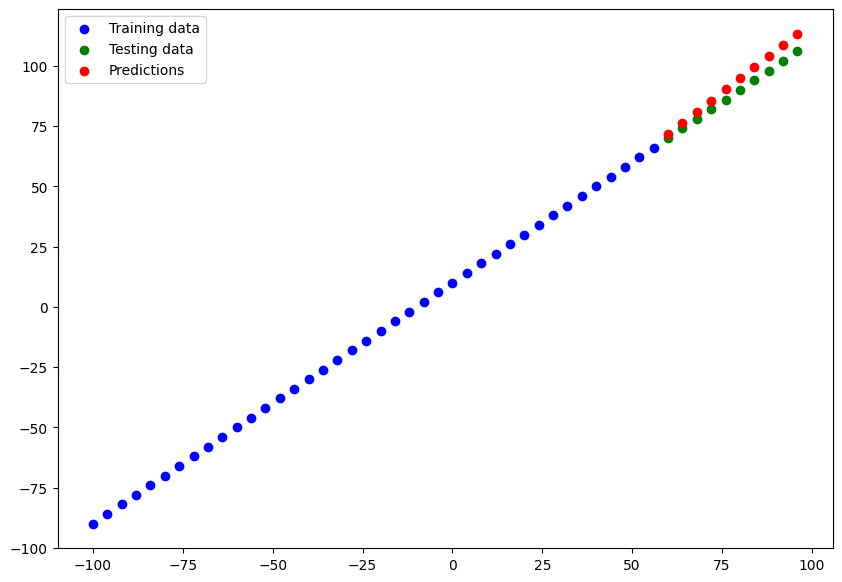

In [31]:
plot_predictions()

### Evaluation Metrics

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert the predictions and true labels to the same format (e.g., NumPy arrays)
y_test_np = y_test.numpy()

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y_test_np, y_pred)
mae = mean_absolute_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 23.537105843657628
Mean Absolute Error: 4.516165161132813
R-squared: 0.8216885920935029
